# Extracting Octopus data
Extracts data from JSONs served by octopus to power their [social distancing data discourse](https://tech.octopus.energy/data-discourse/2020-social-distancing/index.html) page. This data was last fetched 10:30 17/06/2020.

In [23]:
import json
import datetime as dt
import pandas as pd

# Get data from json
with open("plotly-elec-lines.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)
        
# Placeholder variables
x = []
y = []

# Populate placeholders
for week in data['data']:
    _x = week['x']
    _y = week['y']
    
    # To overlay plots the timestamps for previous weeks have been shifted forwards,
    # so we need to calculate how far they have been shifted in order to correct them
    _x = [dt.datetime.strptime(ts, '%Y-%m-%dT%H:%M:%S') for ts in _x]
    diff = _x[-1]-dt.datetime.strptime(week['name']+' 2020', 'w/c %d %b %Y')
    _x = [ts-diff for ts in _x]
    
    x.extend(_x)
    
    # y is unchanged
    y.extend(week['y'])
    
plotly_elec_lines = pd.DataFrame(y, index=x, columns=['Electricity'])
plotly_elec_lines.sort_index(inplace=True)
plotly_elec_lines.to_csv('plotly-elec-lines.csv')

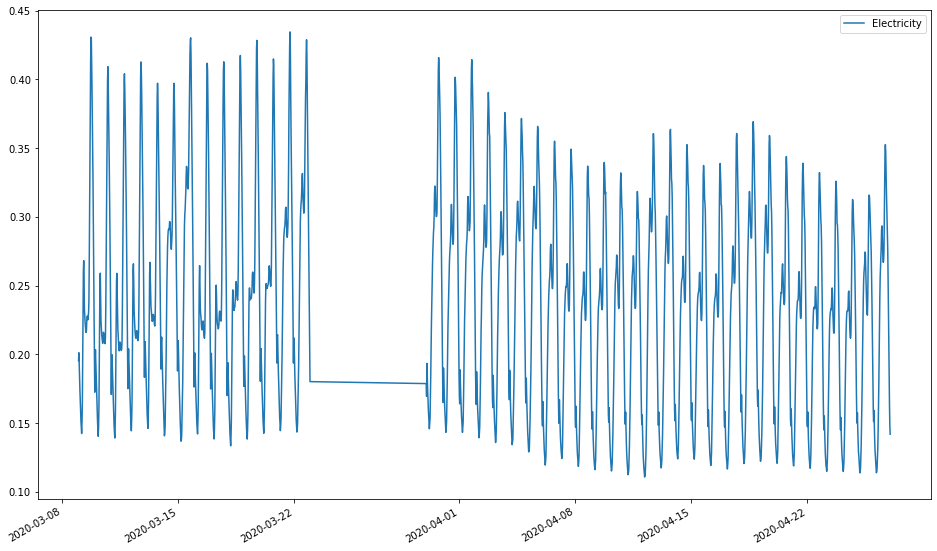

In [24]:
plotly_elec_lines.plot(figsize=(16,10))

In [25]:
# Get data from json
with open("plotly-gas-lines.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)
        
# Placeholder variables
x = []
y = []

# Populate placeholders
for week in data['data']:
    _x = week['x']
    _y = week['y']
    
    # To overlay plots the timestamps for previous weeks have been shifted forwards,
    # so we need to calculate how far they have been shifted in order to correct them
    _x = [dt.datetime.strptime(ts, '%Y-%m-%dT%H:%M:%S') for ts in _x]
    diff = _x[-1]-dt.datetime.strptime(week['name']+' 2020', 'w/c %d %b %Y')
    _x = [ts-diff for ts in _x]
    
    x.extend(_x)
    
    # y is unchanged
    y.extend(week['y'])
    
plotly_gas_lines = pd.DataFrame(y, index=x, columns=['Gas (corrected)'])
plotly_gas_lines.sort_index(inplace=True)

plotly_gas_lines.to_csv('plotly-gas-lines.csv')

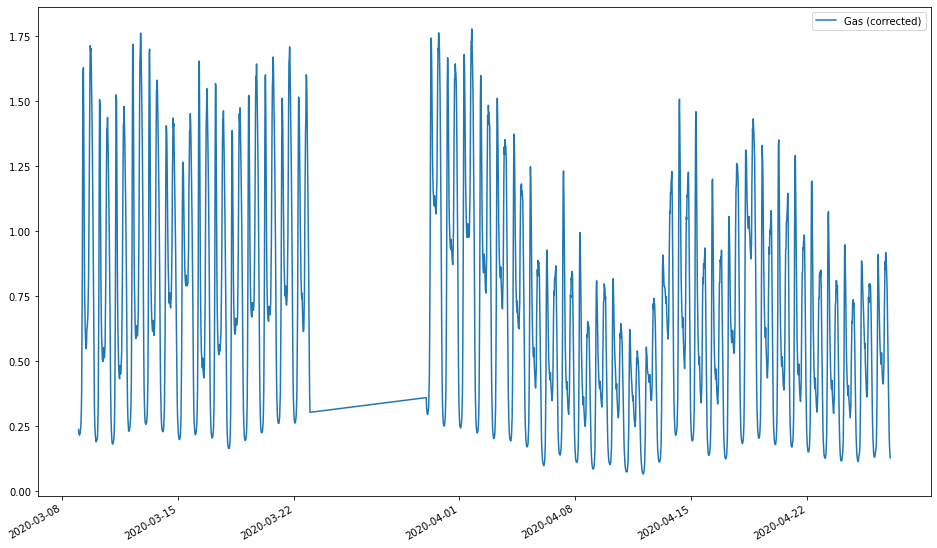

In [26]:
plotly_gas_lines.plot(figsize=(16,10))

In [35]:
energy = pd.concat([plotly_elec_lines, plotly_gas_lines], axis=1)

In [38]:
energy

,Electricity,Gas (corrected)
2020-03-09 00:00:00,0.195528,0.237184
2020-03-09 00:30:00,0.201167,0.223706
2020-03-09 01:00:00,0.191105,0.216553
2020-03-09 01:30:00,0.181536,0.215153
2020-03-09 02:00:00,0.173406,0.220559
...,...,...
2020-04-26 22:30:00,0.208888,0.297095
2020-04-26 23:00:00,0.183586,0.220050
2020-04-26 23:30:00,0.162812,0.175113
2020-04-27 00:00:00,0.147713,0.149836


In [31]:
energy.to_csv('octopus.csv')

,Electricity
2020-03-09 00:00:00,0.195528
2020-03-09 00:30:00,0.201167
2020-03-09 01:00:00,0.191105
2020-03-09 01:30:00,0.181536
2020-03-09 02:00:00,0.173406
...,...
2020-04-26 22:30:00,0.208888
2020-04-26 23:00:00,0.183586
2020-04-26 23:30:00,0.162812
2020-04-27 00:00:00,0.147713
